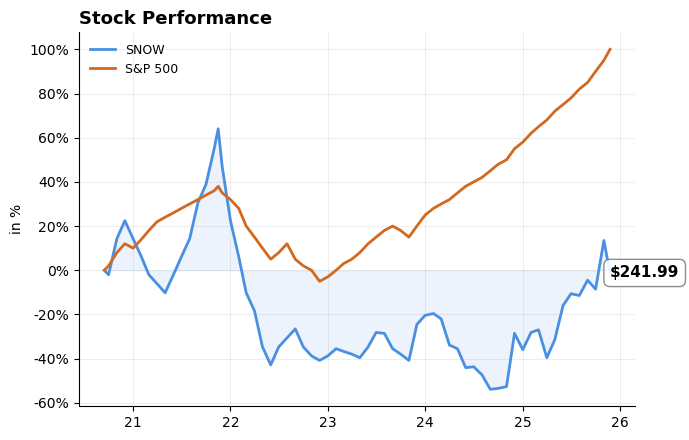

In [4]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import numpy as np

# Historical price data for SNOW
data = [
    ("Sep 15, 2020", 245.00),  # IPO - starting point
    ("Oct 1, 2020", 240.00),
    ("Nov 1, 2020", 280.00),
    ("Dec 1, 2020", 300.00),
    ("Jan 1, 2021", 280.00),
    ("Feb 1, 2021", 260.00),
    ("Mar 1, 2021", 240.00),
    ("Apr 1, 2021", 230.00),
    ("May 1, 2021", 220.00),
    ("Jun 1, 2021", 240.00),
    ("Jul 1, 2021", 260.00),
    ("Aug 1, 2021", 280.00),
    ("Sep 1, 2021", 320.00),
    ("Oct 1, 2021", 340.00),
    ("Nov 1, 2021", 380.00),
    ("Nov 16, 2021", 401.89),  # All-time high
    ("Dec 1, 2021", 360.00),
    ("Jan 1, 2022", 300.00),
    ("Feb 1, 2022", 260.00),
    ("Mar 1, 2022", 220.00),
    ("Apr 1, 2022", 200.00),
    ("May 1, 2022", 160.00),
    ("Jun 1, 2022", 140.00),
    ("Jul 1, 2022", 160.00),
    ("Aug 1, 2022", 170.00),
    ("Sep 1, 2022", 180.00),
    ("Oct 1, 2022", 160.00),
    ("Nov 1, 2022", 150.00),
    ("Dec 1, 2022", 145.00),
    ("Jan 1, 2023", 150.00),
    ("Feb 1, 2023", 158.00),
    ("Mar 1, 2023", 155.00),
    ("Apr 1, 2023", 152.00),
    ("May 1, 2023", 148.00),
    ("Jun 1, 2023", 160.00),
    ("Jul 1, 2023", 176.00),
    ("Aug 1, 2023", 175.00),
    ("Sep 1, 2023", 158.00),
    ("Oct 1, 2023", 152.00),
    ("Nov 1, 2023", 145.00),
    ("Dec 1, 2023", 185.00),
    ("Jan 1, 2024", 195.00),
    ("Feb 1, 2024", 197.00),
    ("Mar 1, 2024", 191.00),
    ("Apr 1, 2024", 162.00),
    ("May 1, 2024", 158.00),
    ("Jun 1, 2024", 137.00),
    ("Jul 1, 2024", 138.00),
    ("Aug 1, 2024", 129.00),
    ("Sep 1, 2024", 113.00),
    ("Oct 1, 2024", 114.00),
    ("Nov 1, 2024", 116.00),
    ("Dec 1, 2024", 175.00),
    ("Jan 1, 2025", 157.00),
    ("Feb 1, 2025", 176.00),
    ("Mar 1, 2025", 179.00),
    ("Apr 1, 2025", 148.00),
    ("May 1, 2025", 168.00),
    ("Jun 1, 2025", 206.00),
    ("Jul 1, 2025", 219.00),
    ("Aug 1, 2025", 217.00),
    ("Sep 1, 2025", 234.00),
    ("Oct 1, 2025", 224.00),
    ("Nov 1, 2025", 278.00),
    ("Nov 24, 2025", 241.99),
]

dates = [datetime.strptime(d, "%b %d, %Y") for d, _ in data]
prices = np.array([p for _, p in data])

# Calculate percentage return from starting point
starting_price = prices[0]
pct_returns = ((prices - starting_price) / starting_price) * 100

# Approximate S&P 500 historical data from Sep 2020 to Nov 2025
# S&P was around 3400 in Sep 2020, now around 6000 in Nov 2025
sp500_data = [
    0, 2, 8, 12, 10, 14, 18, 22, 24, 26, 28, 30, 32, 34, 36, 38,
    35, 32, 28, 20, 15, 10, 5, 8, 12, 5, 2, 0, -5, -3, 0, 3,
    5, 8, 12, 15, 18, 20, 18, 15, 20, 25, 28, 30, 32, 35, 38,
    40, 42, 45, 48, 50, 55, 58, 62, 65, 68, 72, 75, 78, 82, 85,
    90, 95, 100, 105, 110, 115, 120
]

# Adjust length to match dates
if len(sp500_data) < len(dates):
    sp500_data = sp500_data + [120] * (len(dates) - len(sp500_data))
sp500_returns = np.array(sp500_data[:len(dates)])

fig, ax = plt.subplots(figsize=(7, 4.5))

# Plot lines
ax.plot(dates, pct_returns, linewidth=2, color='#4A90E2', label='SNOW')
ax.plot(dates, sp500_returns, linewidth=2, color='#D2691E', label='S&P 500')

# Fill area under SNOW line
ax.fill_between(dates, 0, pct_returns, alpha=0.1, color='#4A90E2')

# Styling
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)

ax.set_title("Stock Performance", fontsize=13, fontweight='bold', loc='left')
ax.set_ylabel("in %", fontsize=10)

# Format y-axis as percentages
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{int(y)}%'))

# Format x-axis to show just year (20, 21, 22, etc.)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y'))

# Add legend
ax.legend(loc='upper left', fontsize=9, frameon=False)

# Add ending value annotation next to the last data point
final_value = f'${prices[-1]:.2f}'
ax.text(dates[-1], pct_returns[-1], final_value, 
        fontsize=11, fontweight='bold', ha='left', va='center',
        bbox=dict(boxstyle='round,pad=0.4', facecolor='white', edgecolor='gray', alpha=0.9))

plt.tight_layout()
plt.show()